# Fase 4: Busca de Parâmetros

Nesta fase iremos aprofundar a busca de hiperparamewtros, variabndo os parametros ca cada modelos, e compaerandos seus resultados

O primeiro passo que iremos fazer é importar as bibliotecas principais, e estabelecer o ambiente de execução.


In [1]:
# Bibliotecas Externas
import os
import warnings
import pandas as pd
from sklearn.svm import SVC

# Ignorando Warnings
warnings.filterwarnings("ignore")

# Bibliotecas Locais
os.chdir("../..")
from lib import plots, runner

# Definido Variáveis globais
N_SPLITS = 5
RANDOM_STATE = 51

## 0. Importando os Dados

Nosso primero é coletar os dados que preparamos na etapa anterior, para verificar como esses dados se comportam

In [2]:
# Conjunto de treino
X_train = pd.read_csv('./data/processed/X_train.csv')
Y_train = pd.read_csv('./data/processed/Y_train.csv')

Y_train['class'] = Y_train['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de validação
X_val = pd.read_csv('./data/processed/X_val.csv')
Y_val = pd.read_csv('./data/processed/Y_val.csv')


Y_val['class'] = Y_val['class'].apply(lambda val: 1 if val == 'UP' else 0)

# Conjunto de teste
X_test = pd.read_csv('./data/processed/X_test.csv')
Y_test = pd.read_csv('./data/processed/Y_test.csv')

Y_test['class'] = Y_test['class'].apply(lambda val: 1 if val == 'UP' else 0)

## 1. Algoritmos de Machine Learning para Classificação

### SVM

In [4]:
svm_model = SVC(
    probability=True,
    random_state=RANDOM_STATE
)

In [5]:
param_distributions_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5],
}

In [ ]:
# param_distributions_svm = {
#     'C': [0.1, 0.5, 1.0, 3.0, 5.0],
#     'gamma': [0.01, 0.1, 0.5, 1.0, 'auto', 'scale'],
#     'kernel': ['rbf', 'sigmoid']
# }

In [6]:
df_svm, model_svm, params_svm = runner.search_params(
    model=svm_model,
    params=param_distributions_svm,
    X_train=X_train,
    Y_train=Y_train,
    max_combinations=1000
)

Num combinações de hiperparâmetros: 720
Iniciando busca por hiperparâmetros...
Melhor conjunto de hiperparâmetros encontrado: {'kernel': 'rbf', 'gamma': 0.1, 'degree': 2, 'coef0': 0.0, 'C': 100}
Tempo de busca: 160.13s


Cross-Validation (5-folds): 100%|██████████| 5/5 [02:28<00:00, 29.62s/it]


In [7]:
df_svm

,K_,AUC_test,AUC_train,Accuracy_test,Accuracy_train,F1_Score_test,F1_Score_train,Recall_test,Recall_train,FPR_test,TPR_test
1,2,0.759170,0.751652,0.779457,0.772171,0.706644,0.696882,0.635417,0.626820,"[0.0, 0.11707746478873239, 1.0]","[0.0, 0.6354166666666666, 1.0]"
4,5,0.755997,0.755157,0.775359,0.775245,0.703616,0.701784,0.638259,0.632853,"[0.0, 0.12626484821821382, 1.0]","[0.0, 0.6382587369711833, 1.0]"
2,3,0.752819,0.752368,0.774078,0.773004,0.697531,0.697655,0.623544,0.626724,"[0.0, 0.11790585129784426, 1.0]","[0.0, 0.6235438381361128, 1.0]"
0,1,0.749972,0.757285,0.769782,0.776960,0.695564,0.704906,0.629289,0.637548,"[0.0, 0.1293444786625605, 1.0]","[0.0, 0.6292892156862745, 1.0]"
3,4,0.741675,0.755328,0.763320,0.775821,0.682910,0.701560,0.610055,0.630555,"[0.0, 0.12670479542454904, 1.0]","[0.0, 0.6100551808706315, 1.0]"


In [8]:
runner.save_model(model_svm, "svm")
runner.save_results(df_svm, "svm")

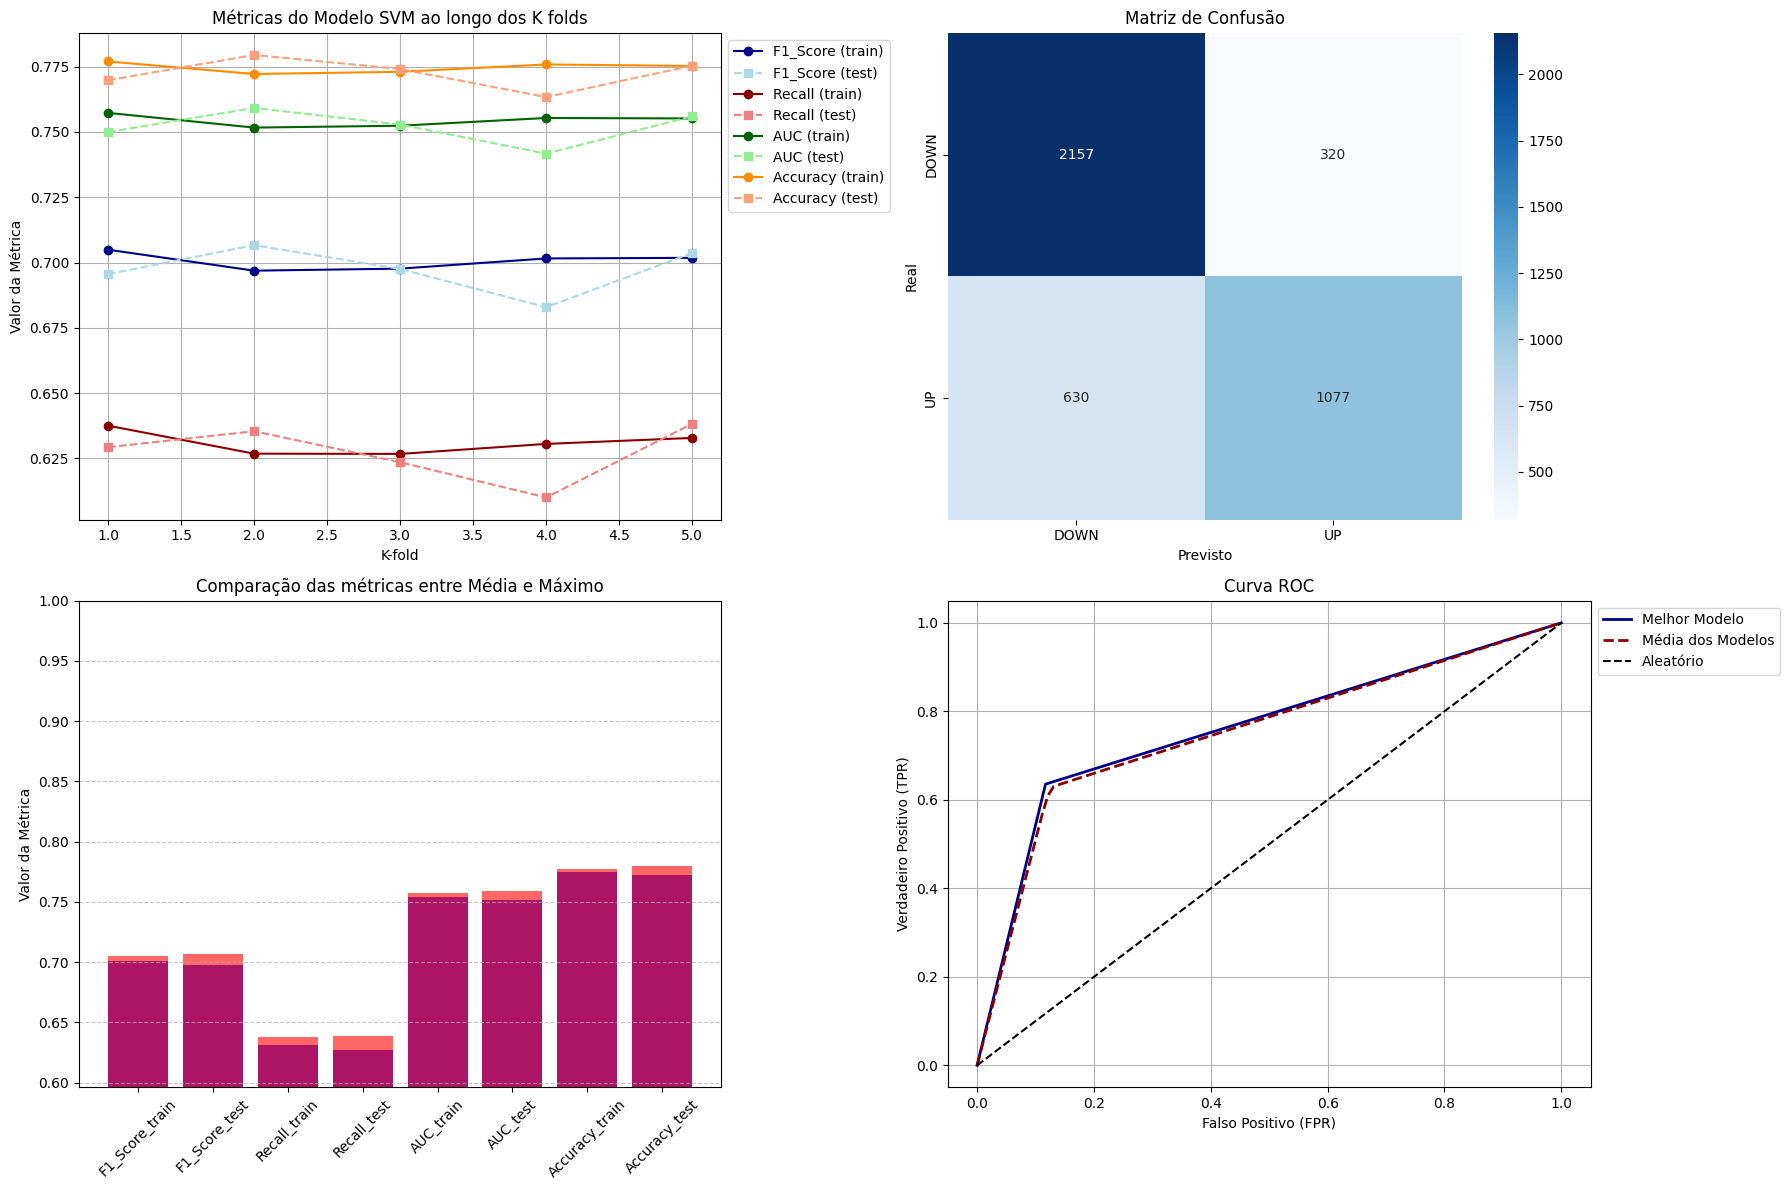

In [9]:
plots.model_evaluate(model_svm, df_svm, X_test, Y_test, model_name="SVM")